<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-CSV" data-toc-modified-id="Load-CSV-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load CSV</a></span></li><li><span><a href="#Investigate-the-data" data-toc-modified-id="Investigate-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Investigate the data</a></span><ul class="toc-item"><li><span><a href="#Overall-dataframe-info" data-toc-modified-id="Overall-dataframe-info-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overall dataframe info</a></span></li><li><span><a href="#Quantity-Sold" data-toc-modified-id="Quantity-Sold-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Quantity Sold</a></span></li><li><span><a href="#Sale-Date" data-toc-modified-id="Sale-Date-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sale Date</a></span></li></ul></li></ul></div>

In [21]:
import datetime

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [156]:
pd.set_option('display.max_rows',100)

#### Load CSV

In [2]:
# load CSV with shop-items with their earliest sale date in train data in Feb 2013 or later
df = pd.read_csv('../../../Kaggle/Kaggle-Competitions/rds_db/query_output_2021_06_16_17_52.csv',
                parse_dates=['sale_date'])
df.head()

,shop_id,item_id,sid_item_category_id,sale_date,sid_shop_item_qty_sold_day
0,0,30,40,2013-02-15,2
1,0,31,37,2013-02-15,3
2,0,36,37,2013-02-15,1
3,0,40,57,2013-02-06,1
4,0,42,57,2013-02-15,1


#### Investigate the data

##### Overall dataframe info

In [17]:
# number of rows and columns
print(f"Dataframe shape: {df.shape[0]:,} rows and {df.shape[1]} columns")

Dataframe shape: 360,900 rows and 5 columns


In [13]:
print(f"# of unique shops: {df.shop_id.nunique()}",
     f"# of unique items: {df.item_id.nunique():,}",
     f"# of unique item categories: {df.sid_item_category_id.nunique()}",
     sep='\n')

# of unique shops: 60
# of unique items: 21,416
# of unique item categories: 84


In [18]:
# value counts (# of shop-items) of item category
df.sid_item_category_id.value_counts()

40    92832
55    51655
37    42195
19    15708
30    13576
      ...  
50        2
0         2
10        1
51        1
1         1
Name: sid_item_category_id, Length: 84, dtype: int64

##### Quantity Sold

In [15]:
# quantity sold values (# of shop-items by quantity sold on first day)
df.sid_shop_item_qty_sold_day.value_counts()

1      336237
2       13792
3        3674
4        1805
5        1125
        ...  
69          1
118         1
121         1
500         1
114         1
Name: sid_shop_item_qty_sold_day, Length: 138, dtype: int64

In [48]:
# unique values of quantity sold on first day
np.sort(df.sid_shop_item_qty_sold_day.unique())

array([ -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        92,  93,  97,  98, 100, 101, 102, 103, 104, 106, 107, 109, 110,
       111, 112, 113, 114, 117, 118, 121, 127, 130, 131, 134, 138, 140,
       142, 145, 147, 148, 151, 156, 167, 168, 171, 179, 187, 207, 217,
       230, 264, 288, 299, 412, 480, 500, 624])

In [51]:
# number of unique quantity sold values on first day by item category
df.groupby('sid_item_category_id').sid_shop_item_qty_sold_day.nunique().sort_values(ascending=False)

sid_item_category_id
20    88
28    75
19    75
30    72
29    53
      ..
27     1
48     1
46     1
34     1
0      1
Name: sid_shop_item_qty_sold_day, Length: 84, dtype: int64

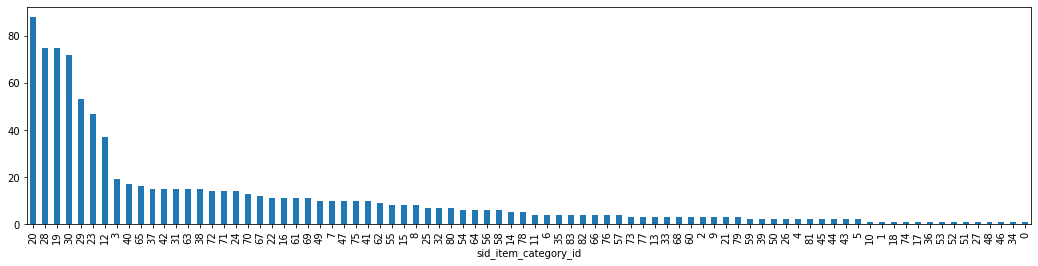

In [58]:
# plot counts of unique values of quantity sold on first day by item category
(df
 .groupby('sid_item_category_id')
 .sid_shop_item_qty_sold_day
 .nunique()
 .sort_values(ascending=False)
 .plot(kind='bar', figsize=(18,4))
)
plt.show()

##### Sale Date

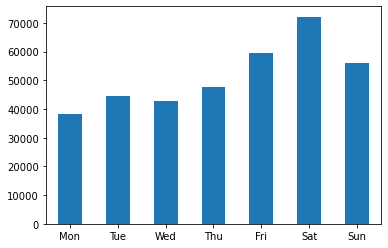

In [56]:
# distribution of day of week of first sale date across all shop-items
dow_dict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
vc = df.sale_date.dt.dayofweek.value_counts().sort_index()
vc.index = vc.index.map(dow_dict)
vc.plot(kind='bar', rot=0);

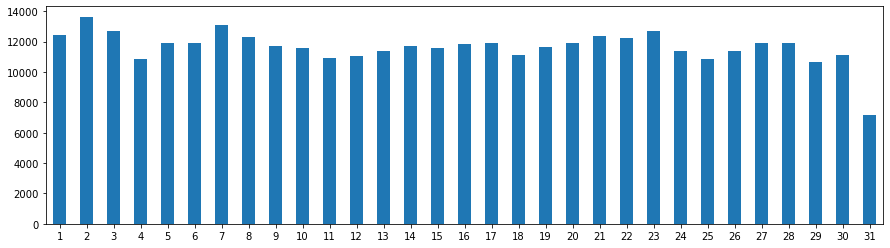

In [57]:
# distribution of day of month of first sale date across all shop-items
df.sale_date.dt.day.value_counts().sort_index().plot(kind='bar', rot=0, figsize=(15,4));

In [60]:
df['dow'] = df.sale_date.dt.dayofweek.map(dow_dict)
df['dom'] = df.sale_date.dt.day
df.head()

,shop_id,item_id,sid_item_category_id,sale_date,sid_shop_item_qty_sold_day,dow,dom
0,0,30,40,2013-02-15,2,Fri,15
1,0,31,37,2013-02-15,3,Fri,15
2,0,36,37,2013-02-15,1,Fri,15
3,0,40,57,2013-02-06,1,Wed,6
4,0,42,57,2013-02-15,1,Fri,15


In [71]:
dow_dict.values()

dict_values(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [72]:
grp_cts = df.groupby(['dom', 'dow']).size().unstack()
grp_cts = grp_cts[dow_dict.values()]
grp_cts.head()

dow,Mon,Tue,Wed,Thu,Fri,Sat,Sun
dom,,,,,,,
1,1490,963,1524,1222,3329,2333,1576
2,1146,1475,854,2201,1560,4664,1738
3,1290,1228,1490,1271,2104,1566,3723
4,2148,1295,1056,1667,1402,1954,1326
5,1027,2793,1300,1330,2151,1685,1605


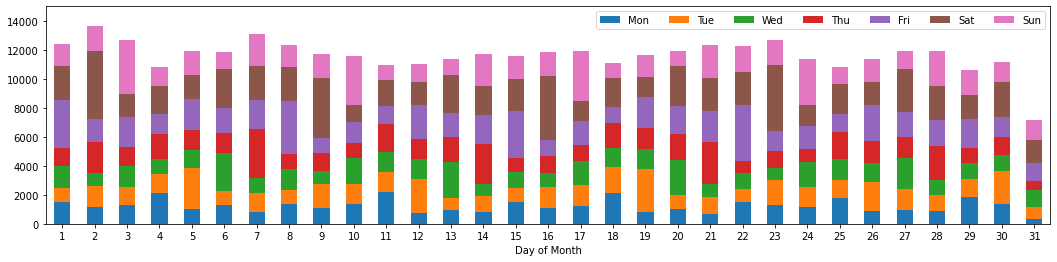

In [73]:
ax = grp_cts.plot(kind='bar', stacked=True, figsize=(18,4), rot=0)
ax.set_xlabel('Day of Month')
ax.set_ylim(0,15000)
plt.legend(ncol=7)
plt.show()

In [74]:
grp_cts = df.groupby(['shop_id', 'dow']).size().unstack()
grp_cts = grp_cts[dow_dict.values()]
grp_cts.head()

dow,Mon,Tue,Wed,Thu,Fri,Sat,Sun
shop_id,,,,,,,
0,109.0,100.0,139.0,200.0,257.0,261.0,149.0
1,122.0,97.0,108.0,159.0,146.0,227.0,129.0
2,368.0,681.0,559.0,477.0,673.0,714.0,649.0
3,425.0,545.0,490.0,535.0,814.0,1065.0,843.0
4,676.0,786.0,737.0,743.0,1000.0,1239.0,1066.0


In [76]:
# find shops with nulls for at least one day of the week
grp_cts[grp_cts.isnull().any(axis=1)]

dow,Mon,Tue,Wed,Thu,Fri,Sat,Sun
shop_id,,,,,,,
9,NaN,NaN,NaN,521.0,461.0,294.0,128.0
20,NaN,NaN,NaN,241.0,231.0,182.0,92.0


In [77]:
# remove those shops
grp_cts = df[~df.shop_id.isin([9,20])].groupby(['shop_id', 'dow']).size().unstack()
grp_cts = grp_cts[dow_dict.values()]
grp_cts.head()

dow,Mon,Tue,Wed,Thu,Fri,Sat,Sun
shop_id,,,,,,,
0,109,100,139,200,257,261,149
1,122,97,108,159,146,227,129
2,368,681,559,477,673,714,649
3,425,545,490,535,814,1065,843
4,676,786,737,743,1000,1239,1066


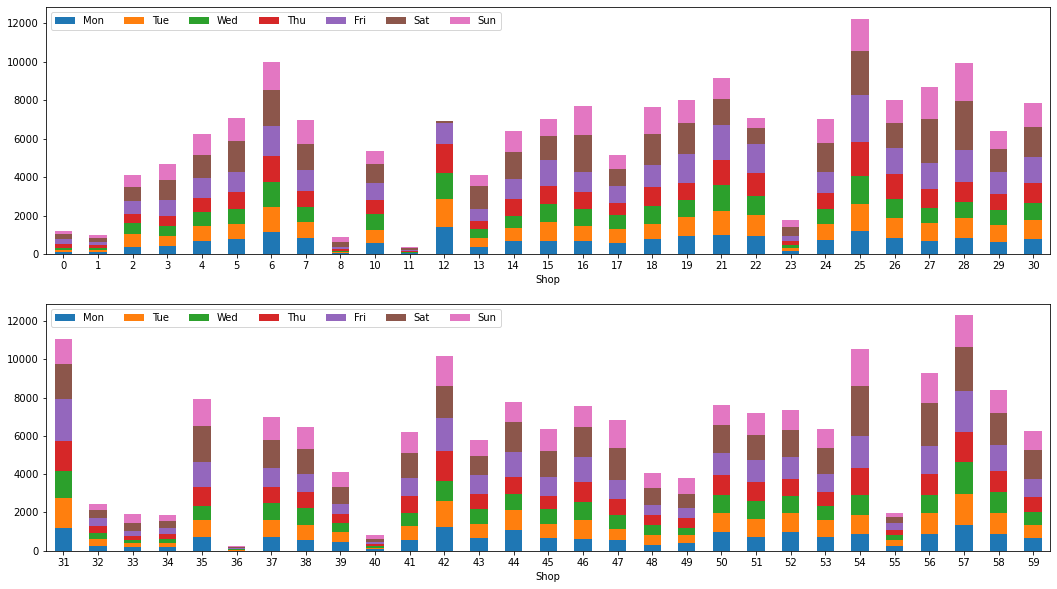

In [126]:
my_cmap = plt.get_cmap("tab10")

fig, axes = plt.subplots(nrows = 2, figsize=(18,10))
fig.subplots_adjust(hspace=0.2)

grp_cts.head(int(len(grp_cts)*.5)).plot(kind='bar', stacked=True, rot=0, ax=axes[0], color=my_cmap.colors)
axes[0].set_xlabel('Shop')
axes[0].legend(ncol=7)

grp_cts.tail(int(len(grp_cts)*.5)).plot(kind='bar', stacked=True, rot=0, ax=axes[1], color=my_cmap.colors)
axes[1].set_xlabel('Shop')
axes[1].legend(ncol=7)

plt.show()

In [115]:
# convert shop-level counts to percentages
grp_cts_pct = grp_cts.div(grp_cts.sum(axis=1), axis=0)
grp_cts_pct.head()

dow,Mon,Tue,Wed,Thu,Fri,Sat,Sun
shop_id,,,,,,,
0,0.089712,0.082305,0.114403,0.164609,0.211523,0.214815,0.122634
1,0.123482,0.098178,0.109312,0.160931,0.147773,0.229757,0.130567
2,0.089299,0.165251,0.135647,0.115749,0.163310,0.173259,0.157486
3,0.090100,0.115540,0.103880,0.113420,0.172567,0.225779,0.178715
4,0.108212,0.125820,0.117977,0.118937,0.160077,0.198335,0.170642


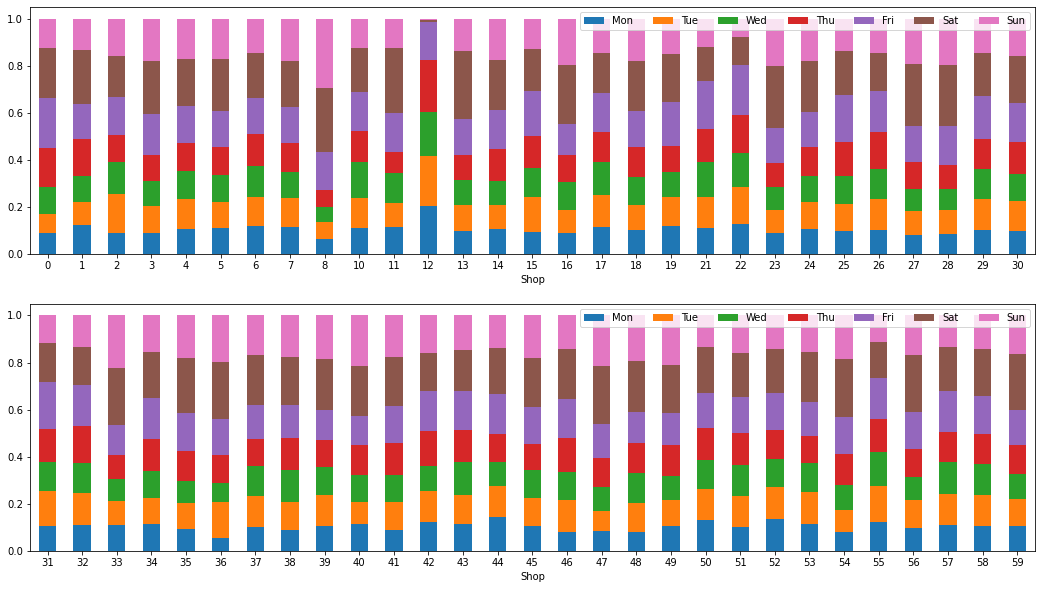

In [117]:
# create plot in percentage form
fig, axes = plt.subplots(nrows = 2, figsize=(18,10))
fig.subplots_adjust(hspace=0.2)

grp_cts_pct.head(int(len(grp_cts)*.5)).plot(kind='bar', stacked=True, rot=0, ax=axes[0])
axes[0].set_xlabel('Shop')
axes[0].legend(ncol=7)

grp_cts_pct.tail(int(len(grp_cts)*.5)).plot(kind='bar', stacked=True, rot=0, ax=axes[1])
axes[1].set_xlabel('Shop')
axes[1].legend(ncol=7)

plt.show()

In [128]:
# shop 12 has almost no first sales dates on Saturdays or Sundays
grp_cts_pct[grp_cts_pct.index == 12]

dow,Mon,Tue,Wed,Thu,Fri,Sat,Sun
shop_id,,,,,,,
12,0.205199,0.211841,0.189458,0.217617,0.163755,0.009531,0.002599


In [143]:
# are there items (and item categories) that are never introduced/sold at some shops?

# get counts of items for each number of shops at which a new item was sold
# (e.g., below 4,253 items were sold at one shop only, 999 items were sold at 2 shops, etc.)
(df
 .groupby('item_id')['shop_id']
 .count()
 .reset_index(name='shop_count')
 .groupby('shop_count')['item_id']
 .count()
 .reset_index(name="n_items")
 .sort_values(by='n_items', ascending=False)
)

,shop_count,n_items
0,1,4253
1,2,999
2,3,685
3,4,590
4,5,566
5,6,555
7,8,536
6,7,534
8,9,528
11,12,514


In [147]:
# get counts of item categories for each number of shops at which a new item was sold
# (e.g., below 16 item categories were sold at one shop only, another 11 item categories were sold
# at 58 shops, etc.)
(df
 .groupby('sid_item_category_id')['shop_id']
 .nunique()
 .reset_index(name='shop_count')
 .groupby('shop_count')['sid_item_category_id']
 .count()
 .reset_index(name="n_item_cats")
 .sort_values(by='n_item_cats', ascending=False)
)

,shop_count,n_item_cats
0,1,16
25,58,11
22,55,6
21,54,6
17,50,5
20,53,5
26,59,5
24,57,3
15,47,3
7,23,2


In [152]:
# how much of a variation in first sale date is there for one item across shops?
sale_dt_diffs = (df
                 .groupby(['sid_item_category_id', 'item_id'])['sale_date']
                 .max()
                 .reset_index(name='latest_first_sale_dt')
                )

sale_dt_diffs['earliest_first_sale_dt'] = (df
                                           .groupby(['sid_item_category_id', 'item_id'])['sale_date']
                                           .min()
                                           .values
                                          )

sale_dt_diffs['date_diff'] = (sale_dt_diffs['latest_first_sale_dt'] - sale_dt_diffs['earliest_first_sale_dt']).dt.days

sale_dt_diffs.head()

,sid_item_category_id,item_id,latest_first_sale_dt,earliest_first_sale_dt,date_diff
0,0,16255,2013-02-28,2013-02-28,0
1,0,16256,2013-04-02,2013-04-02,0
2,1,5740,2013-02-20,2013-02-20,0
3,2,5570,2013-02-28,2013-02-28,0
4,2,5571,2014-04-26,2013-02-03,447


In [154]:
sale_dt_diffs.date_diff.describe()

count    21416.000000
mean       265.094462
std        253.889000
min          0.000000
25%         35.000000
50%        203.000000
75%        414.000000
max       1002.000000
Name: date_diff, dtype: float64

In [158]:
# examine distribution of difference between earliest and latest first sale date of an item in each item category
sale_dt_diffs.groupby('sid_item_category_id').date_diff.describe().reset_index()

,sid_item_category_id,count,mean,std,min,25%,50%,75%,max
0,0,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1,1,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
2,2,73.0,411.000000,296.231188,0.0,216.00,360.0,647.00,1000.0
3,3,33.0,313.121212,196.024992,7.0,223.00,322.0,439.00,701.0
4,4,13.0,289.230769,246.206605,0.0,44.00,271.0,427.00,812.0
5,5,29.0,506.482759,200.331443,152.0,331.00,490.0,643.00,907.0
6,6,39.0,487.282051,274.038410,0.0,286.00,477.0,678.50,990.0
7,7,23.0,254.391304,145.425313,0.0,145.50,331.0,379.00,400.0
8,8,9.0,41.000000,53.712196,0.0,0.00,0.0,74.00,148.0
9,9,7.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [159]:
df[df.sid_item_category_id == 31]['sale_date'].nunique()

499

In [160]:
sale_dt_diffs[sale_dt_diffs.sid_item_category_id == 31]['item_id'].nunique()

1100

In [161]:
sale_dt_diffs[sale_dt_diffs.sid_item_category_id == 31]['date_diff'].nunique()

1

In [ ]:
# 1,100 items in item_category 31 were first sold on 499 different days.
# Once they were sold at a shop or multiple shops on that first day, they were never sold at another shop after that.
# (They could have been sold at that same shop(s) where they were sold on that first day.)

In [ ]:
# Sale date
# distribution of day of week by shop (do shops introduce new items on specific days, are they not open at all on certain days)
# should probably investigate if any of the first sale dates coincide with shop opening (first sale date at shop)

# how much of a variation in first sale date is there for one item across shops?
# are there items (and item categories) that are never introduced/sold at some shops?

# Quantity sold
# Quantity sold by item category and by item

# can try to figure out if any shop-items should just always be 0 in the test period